In [111]:
# Import our dependencies
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [112]:
# Import data from database
con = sqlite3.connect('HouseInfo.db')
df = pd.read_sql_query('Select * from Selling', con)
df = pd.DataFrame(df)
df.head()

,City,HouseName,Lng,Lat,District,id,TotalPrice,Price,Floor,Square,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,ConstructionTime,BedRooms,LivingRooms,Kitchen,BathRooms
0,beijing,富力又一城B区,116.568935,39.852754,朝阳,101112779955,7950000.0,50579,High,157.18,Flat,Plate,Steel/Concrete,Hardcover,Yes,2008,3,2,1,2
1,beijing,白广路7号院,116.363689,39.890353,西城,101112823905,6350000.0,109805,Low,57.83,Flat,Plate,Mixed,Other,No,1984,2,1,1,1
2,beijing,莱茵河畔,116.479698,39.803397,亦庄开发区,101112557404,5850000.0,54072,Low,108.19,Flat,Plate,Steel/Concrete,Hardcover,Yes,2003,2,1,1,1
3,beijing,瑞海家园五区,116.343366,39.789172,大兴,101112573961,5090000.0,46379,First Floor,109.75,Flat,Plate,Mixed,Hardcover,No,2004,3,1,1,1
4,beijing,合生世界村,116.552980,39.743074,通州,101111602994,2730000.0,30063,Middle,90.81,Flat,Plate,Steel/Concrete,Hardcover,Yes,2011,2,1,1,1


In [113]:
corrmat = df.corr()
print(corrmat['TotalPrice'].sort_values(ascending=False))

TotalPrice    1.000000
Lat           0.316722
Lng           0.193704
id           -0.265748
Name: TotalPrice, dtype: float64


In [114]:
df = df.drop(['Price', 'Square', 'HouseName', 'id', 'Lng', 'Lat', 'ConstructionTime'],axis=1)
df.head()

,City,District,TotalPrice,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms
0,beijing,朝阳,7950000.0,High,Flat,Plate,Steel/Concrete,Hardcover,Yes,3,2,1,2
1,beijing,西城,6350000.0,Low,Flat,Plate,Mixed,Other,No,2,1,1,1
2,beijing,亦庄开发区,5850000.0,Low,Flat,Plate,Steel/Concrete,Hardcover,Yes,2,1,1,1
3,beijing,大兴,5090000.0,First Floor,Flat,Plate,Mixed,Hardcover,No,3,1,1,1
4,beijing,通州,2730000.0,Middle,Flat,Plate,Steel/Concrete,Hardcover,Yes,2,1,1,1


In [115]:
df.replace(to_replace=r'Unknown', value=np.nan, regex=True, inplace=True)

In [116]:
df.isnull().sum()

City                     0
District                 0
TotalPrice               0
Floor                    0
FloorType                0
BuildingType             0
BuildingStructure       21
RenovationCondition      0
Elevator               186
BedRooms                 0
LivingRooms              0
Kitchen                  0
BathRooms                0
dtype: int64

In [117]:
df = df.dropna()
df.isnull().sum()

City                   0
District               0
TotalPrice             0
Floor                  0
FloorType              0
BuildingType           0
BuildingStructure      0
RenovationCondition    0
Elevator               0
BedRooms               0
LivingRooms            0
Kitchen                0
BathRooms              0
dtype: int64

## Encoding

In [118]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['City'] = labelencoder.fit_transform(df['City'])
df['District'] = labelencoder.fit_transform(df['District'])
df['Floor'] = labelencoder.fit_transform(df['Floor'])
df['Elevator'] = labelencoder.fit_transform(df['Elevator'])
df['FloorType'] = labelencoder.fit_transform(df['FloorType'])
df['BuildingType'] = labelencoder.fit_transform(df['BuildingType'])
df['BuildingStructure'] = labelencoder.fit_transform(df['BuildingStructure'])
df['RenovationCondition'] = labelencoder.fit_transform(df['RenovationCondition'])

In [119]:
df.head()

,City,District,TotalPrice,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms
0,0,19,7950000.0,2,2,2,5,0,1,3,2,1,2
1,0,31,6350000.0,3,2,2,3,1,0,2,1,1,1
2,0,2,5850000.0,3,2,2,5,0,1,2,1,1,1
3,0,7,5090000.0,1,2,2,3,0,0,3,1,1,1
4,0,33,2730000.0,4,2,2,5,0,1,2,1,1,1


## Correlation Heatmap

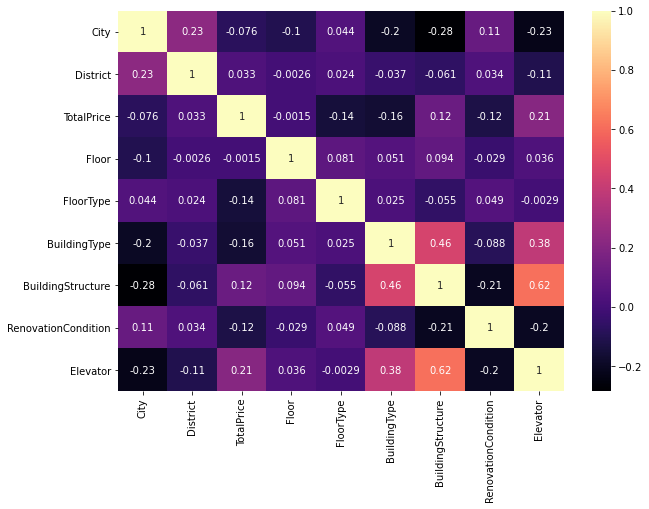

In [120]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap = 'magma',ax=ax)

# plt.savefig('heatmap.png')
plt.show()

In [121]:
corrmat = df.corr()
print(corrmat['TotalPrice'].sort_values(ascending=False))

TotalPrice             1.000000
Elevator               0.209237
BuildingStructure      0.117245
District               0.033098
Floor                 -0.001451
City                  -0.075737
RenovationCondition   -0.122893
FloorType             -0.144292
BuildingType          -0.160800
Name: TotalPrice, dtype: float64


## Calculate Statistics

In [122]:
# Minimum price of the data
minimum_price = np.amin(df['TotalPrice'])

# Maximum price of the data
maximum_price = np.amax(df['TotalPrice'])

# Mean price of the data
mean_price = np.mean(df['TotalPrice'])

# Median price of the data
median_price = np.median(df['TotalPrice'])

# Standard deviation of prices of the data
std_price = np.std(df['TotalPrice'])

# Show the calculated statistics
print("Statistics for Housing dataset:\n")
print("Minimum price: ￥{}".format(minimum_price)) 
print("Maximum price: ￥{}".format(maximum_price))
print("Mean price: ￥{}".format(mean_price))
print("Median price ￥{}".format(median_price))
print("Standard deviation of prices: ￥{}".format(std_price))

Statistics for Housing dataset:

Minimum price: ￥250000.0
Maximum price: ￥98000000.0
Mean price: ￥4807854.270122783
Median price ￥3760000.0
Standard deviation of prices: ￥4242514.541090673


# Machine Learning

## Spliting into training and testing dataset

In [123]:
X = df.drop(['TotalPrice'], axis = 1)
y = df['TotalPrice']

In [124]:
print(X.shape)
print(y.shape)

(7330, 12)
(7330,)


In [125]:
# split data to 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [126]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5864, 12)
(1466, 12)
(5864,)
(1466,)


## Standardization

In [127]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Multiple Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.3242493439623847
0.38539979917493605


In [129]:
# prediction
y_pred_lr = lr_model.predict(X_test)

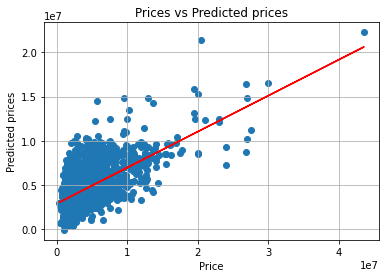

In [130]:
# visualization
y1_test = y_test.values.reshape(-1,1)

lr_model = LinearRegression()
lr_model.fit(y1_test, y_pred_lr)
y1_pred_lr = lr_model.predict(y1_test)

plt.scatter(y1_test, y_pred_lr)
plt.xlabel("Price")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid()

plt.plot(y1_test, y1_pred_lr, color='red')
plt.show()

In [131]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
print('r2 socre is ', r2_score(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

r2 socre is  0.38539979917493605
Root Mean Squared Error: 2930356.984299326


The value of root mean squared error is higher than 10% of the mean value of price (i.e. ￥4799642). This means that our algorithm was not very accurate.

## Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.955560635474592
0.5827717214206121


In [133]:
# prediction
y_pred_dt = dt_model.predict(X_test)

In [134]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

r2 socre is  0.5827717214206121
Root Mean Squared Error: 2414410.1581833963


## Random Forest

In [135]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 500}

In [136]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.91577768644308
0.7085426046440196


In [137]:
# prediction
y_pred_rf = rf_model.predict(X_test)

In [138]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2 socre is  0.7085426046440196
Root Mean Squared Error: 2017956.133912447


## SVR

In [139]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

print(svr_model.score(X_train, y_train))
print(svr_model.score(X_test, y_test))

-0.058529642039009566
-0.06660090881459557


In [140]:
# prediction
y_pred_svr = svr_model.predict(X_test)

In [141]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

r2 socre is  -0.06660090881459557
Root Mean Squared Error: 3860336.4393887524


## LightGBM Regression

In [142]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

print(lgb_model.score(X_train, y_train))
print(lgb_model.score(X_test, y_test))

0.7974118975791629
0.7369871140619224


In [143]:
# prediction
y_pred_lgb = lgb_model.predict(X_test)

In [144]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb)))

r2 socre is  0.7369871140619224
Root Mean Squared Error: 1916958.4292163819


## Lasso

In [145]:
# Find optimal alpha for the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = np.array([1, 0.5, 0.1, 0.01, 0])

lasso_model = Lasso()
grid_search = GridSearchCV(estimator = lasso_model, param_grid = dict(alpha=alphas))

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.alpha

C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.736026886995605e+16, tolerance: 8316879807928.117
  positive)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fi

1.0

In [146]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.3242493439614623
0.38539989321097046


In [147]:
# prediction
y_pred_lasso = lasso_model.predict(X_test)

In [148]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

r2 socre is  0.38539989321097046
Root Mean Squared Error: 2930356.7601217544


## KNN

In [149]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 11, 'weights': 'distance'}


In [150]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train, y_train)

print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.955322669528047
0.5996257968234271


In [151]:
# prediction
y_pred_knn = knn_model.predict(X_test)

In [152]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

r2 socre is  0.5996257968234271
Root Mean Squared Error: 2365142.027123254


## Compare scores of each model

In [153]:
for reg in (lr_model, dt_model, rf_model, lgb_model, svr_model, knn_model, lasso_model):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, "Mean Squared Error:", mean_squared_error(y_test, y_pred)/100000000)
    print(reg.__class__.__name__, "R2:", r2_score(y_test, y_pred))

LinearRegression Mean Squared Error: 85869.92055431839
LinearRegression R2: 0.38539979917493605
DecisionTreeRegressor Mean Squared Error: 67815.79277536576
DecisionTreeRegressor R2: 0.5146193266536724
RandomForestRegressor Mean Squared Error: 40721.46958394869
RandomForestRegressor R2: 0.7085426046440196
LGBMRegressor Mean Squared Error: 36747.29619343738
LGBMRegressor R2: 0.7369871140619224
SVR Mean Squared Error: 149021.97425272633
SVR R2: -0.06660090881459557
KNeighborsRegressor Mean Squared Error: 55938.968084646935
KNeighborsRegressor R2: 0.5996257968234271
Lasso Mean Squared Error: 85869.90741591265
Lasso R2: 0.38539989321097046


## Result for now

We choose LGBMRegressor since it has lowest MSE and highest R2 score, meaning that it has most data being explained by our model.
However, it seems that we still need some improvement to our model because the R2 score is not good enough.
We can drop some features to improve the result, but before dropping features, we need to figure out which feature is important and which one is not.
To do so, we can list the feature importance lists.
We ignore the SVR model because the score is too bad.
We can list their feature importance lists, however, we only have the feature index and we don't have the feature name, we need to add the feature names on our feature importance lists. 


# Improvement on models

In [154]:
from sklearn.inspection import permutation_importance

# feature importance list
lr_importance = lr_model.coef_
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_
lgb_importance = lgb_model.feature_importances_
knn_results = permutation_importance(knn_model, X_test, y_test, scoring='neg_mean_squared_error')
knn_importance = knn_results.importances_mean

In [155]:
# first find all names of those features 
feature_names = X.columns
print(feature_names)

Index(['City', 'District', 'Floor', 'FloorType', 'BuildingType',
       'BuildingStructure', 'RenovationCondition', 'Elevator', 'BedRooms',
       'LivingRooms', 'Kitchen', 'BathRooms'],
      dtype='object')


In [156]:
lr_importance_df = pd.DataFrame(lr_importance,index = feature_names)
lr_importance_df.head()

,0
City,-4.495513e+05
District,2.942677e+05
Floor,4.996989e+04
FloorType,-9.488268e+02
BuildingType,-1.031419e+06


In [157]:
sel_lr_df = lr_importance_df.loc[lr_importance_df[0] > 0]
sel_lr_df.head()

,0
District,2.942677e+05
Floor,4.996989e+04
Elevator,1.001895e+06
BedRooms,6.255164e+05
Kitchen,1.723566e+05


In [158]:
dt_importance_df = pd.DataFrame(dt_importance,index = feature_names)
dt_importance_df.head()

,0
City,0.094177
District,0.211284
Floor,0.044451
FloorType,0.034217
BuildingType,0.074128


In [159]:
sel_dt_df = dt_importance_df.loc[dt_importance_df[0] > 0]
sel_dt_df.head()

,0
City,0.094177
District,0.211284
Floor,0.044451
FloorType,0.034217
BuildingType,0.074128


In [160]:
rf_importance_df = pd.DataFrame(rf_importance,index = feature_names)
rf_importance_df.head()

,0
City,0.105774
District,0.229954
Floor,0.042838
FloorType,0.036344
BuildingType,0.069984


In [161]:
sel_rf_df = rf_importance_df.loc[rf_importance_df[0] > 0]
sel_rf_df.head()

,0
City,0.105774
District,0.229954
Floor,0.042838
FloorType,0.036344
BuildingType,0.069984


In [162]:
lgb_importance_df = pd.DataFrame(lgb_importance, index=feature_names)
lgb_importance_df1 = lgb_importance_df.reset_index(level=0)
lgb_importance_df1['importance']=lgb_importance_df1[0]
lgb_importance_df1

,index,0,importance
0,City,239,239
1,District,1198,1198
2,Floor,212,212
3,FloorType,122,122
4,BuildingType,184,184
5,BuildingStructure,66,66
6,RenovationCondition,116,116
7,Elevator,144,144
8,BedRooms,252,252
9,LivingRooms,127,127


In [163]:
sorted = lgb_importance_df1.sort_values('importance', ascending=False)
sorted

,index,0,importance
1,District,1198,1198
11,BathRooms,311,311
8,BedRooms,252,252
0,City,239,239
2,Floor,212,212
4,BuildingType,184,184
7,Elevator,144,144
9,LivingRooms,127,127
3,FloorType,122,122
6,RenovationCondition,116,116


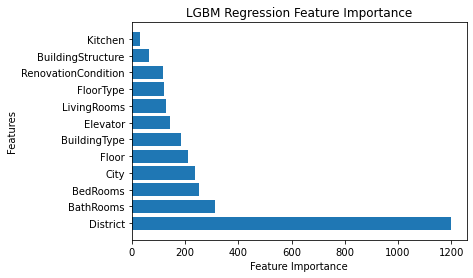

In [164]:
plt.barh(sorted['index'], sorted['importance'], data=sorted)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LGBM Regression Feature Importance')
plt.savefig('feature importance.png')

In [165]:
lgb_index = lgb_importance_df.index
lgb_union = np.append(lgb_index, 'TotalPrice')
lgb_important_df = df[lgb_union]
lgb_important_df.head()

,City,District,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms,TotalPrice
0,0,19,2,2,2,5,0,1,3,2,1,2,7950000.0
1,0,31,3,2,2,3,1,0,2,1,1,1,6350000.0
2,0,2,3,2,2,5,0,1,2,1,1,1,5850000.0
3,0,7,1,2,2,3,0,0,3,1,1,1,5090000.0
4,0,33,4,2,2,5,0,1,2,1,1,1,2730000.0


In [166]:
# drop district column
lgb_important_df.drop(['District'], axis=1, inplace=True)
lgb_important_df.head()

C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms,TotalPrice
0,0,2,2,2,5,0,1,3,2,1,2,7950000.0
1,0,3,2,2,3,1,0,2,1,1,1,6350000.0
2,0,3,2,2,5,0,1,2,1,1,1,5850000.0
3,0,1,2,2,3,0,0,3,1,1,1,5090000.0
4,0,4,2,2,5,0,1,2,1,1,1,2730000.0


In [167]:
# Split data
X_lgb = lgb_important_df.drop(['TotalPrice'], axis=1)
y_lgb = lgb_important_df['TotalPrice']

print(X_lgb.shape)
print(y_lgb.shape)

(7330, 11)
(7330,)


In [168]:
# split data to 80% of training and 20% of testing
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lgb, y_lgb, test_size=0.2, random_state=47)

In [169]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_lgb = sc.fit_transform(X_train_lgb)
X_test_lgb = sc.transform(X_test_lgb)

In [170]:
from sklearn.linear_model import LinearRegression

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_lgb, y_train_lgb)

print(lgb_model.score(X_train_lgb, y_train_lgb))
print(lgb_model.score(X_test_lgb, y_test_lgb))

0.6376124438162313
0.5538343045880558


In [171]:
y_pred_lgb_imp = lgb_model.predict(X_test_lgb)

print('r2 socre is ', r2_score(y_test_lgb, y_pred_lgb_imp))
print("Mean Squared Error:", mean_squared_error(y_test_lgb, y_pred_lgb_imp)/100000000)

r2 socre is  0.5538343045880558
Mean Squared Error: 62336.804914241824


In [172]:
sel_lgb_df = lgb_importance_df.loc[lgb_importance_df[0] > 0]
sel_lgb_df.head()

,0
City,239
District,1198
Floor,212
FloorType,122
BuildingType,184


In [173]:
knn_importance_df = pd.DataFrame(knn_importance,index = feature_names)
knn_importance_df.head()

,0
City,2.608904e+12
District,2.610630e+12
Floor,5.797631e+11
FloorType,4.615175e+11
BuildingType,1.750502e+12


In [174]:
sel_knn_df = knn_importance_df.loc[knn_importance_df[0] > 0]
sel_knn_df.head()

,0
City,2.608904e+12
District,2.610630e+12
Floor,5.797631e+11
FloorType,4.615175e+11
BuildingType,1.750502e+12


In [175]:
# select features which is relatively important in each model 
sel_lr_index = sel_lr_df.index
sel_dt_index = sel_dt_df.index
sel_rf_index = sel_rf_df.index
sel_lgb_index = sel_lgb_df.index
sel_knn_index = sel_knn_df.index

In [176]:
# Union all important features of these 3 models 
union_1 = np.union1d(sel_lr_index, sel_dt_index)
union_2 = np.union1d(union_1, sel_rf_index)
union_3 = np.union1d(union_2, sel_lgb_index)
union_4 = np.union1d(union_3, sel_knn_index)
union = np.append(union_4,'TotalPrice')

In [177]:
df_important = df[union]
df_important

,BathRooms,BedRooms,BuildingStructure,BuildingType,City,District,Elevator,Floor,FloorType,Kitchen,LivingRooms,RenovationCondition,TotalPrice
0,2,3,5,2,0,19,1,2,2,1,2,0,7950000.0
1,1,2,3,2,0,31,0,3,2,1,1,1,6350000.0
2,1,2,5,2,0,2,1,3,2,1,1,0,5850000.0
3,1,3,3,2,0,7,0,1,2,1,1,0,5090000.0
4,1,2,5,2,0,33,1,4,2,1,1,0,2730000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,1,3,5,4,1,41,1,4,2,1,2,0,5380000.0
7517,1,2,5,4,1,32,0,4,2,1,1,3,1680000.0
7518,1,2,5,4,1,29,1,2,2,1,2,3,3800000.0
7519,1,2,5,4,1,29,0,2,2,1,1,0,1200000.0


# Model again

## Split dataset

In [178]:
# Split dataset
X_imp = df_important.drop(['TotalPrice'], axis = 1)
y_imp = df_important['TotalPrice']

In [179]:
print(X_imp.shape)
print(y_imp.shape)

(7330, 12)
(7330,)


In [180]:
# split data to 80% of training and 20% of testing
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=47)

In [181]:
print(X_train_imp.shape)
print(X_test_imp.shape)
print(y_train_imp.shape)
print(y_test_imp.shape)

(5864, 12)
(1466, 12)
(5864,)
(1466,)


## Standardize

In [182]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

## Multiple Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_imp, y_train_imp)

print(lr_model.score(X_train_imp, y_train_imp))
print(lr_model.score(X_test_imp, y_test_imp))

0.3242493439623847
0.38539979917493616


In [184]:
# prediction
y_pred_lr_imp = lr_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lr_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lr_imp)))

r2 socre is  0.38539979917493616
Root Mean Squared Error: 2930356.9842993254


## Decision Tree

In [185]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_imp, y_train_imp)

print(dt_model.score(X_train_imp, y_train_imp))
print(dt_model.score(X_test_imp, y_test_imp))

0.955560635474592
0.5772404478891211


In [186]:
# prediction
y_pred_dt_imp = dt_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_dt_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_dt_imp)))

r2 socre is  0.5772404478891211
Root Mean Squared Error: 2430361.6085284203


## Random Forest Regression

In [187]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 1000}

In [188]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.91577768644308
0.7085426046440196


In [189]:
# prediction
y_pred_rf = rf_model.predict(X_test)

print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2 socre is  0.7085426046440196
Root Mean Squared Error: 2017956.133912447


## LGBM Regression

In [190]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_imp, y_train_imp)

print(lgb_model.score(X_train_imp, y_train_imp))
print(lgb_model.score(X_test_imp, y_test_imp))

0.7974118975791629
0.7369871140619224


In [191]:
# prediction
y_pred_lgb_imp = lgb_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lgb_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lgb_imp)))

r2 socre is  0.7369871140619224
Root Mean Squared Error: 1916958.4292163819


## KNN Regression

In [192]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 11, 'weights': 'distance'}


In [193]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train_imp, y_train_imp)

print(knn_model.score(X_train_imp, y_train_imp))
print(knn_model.score(X_test_imp, y_test_imp))

0.955322669528047
0.5998117207036352


In [194]:
# prediction
y_pred_knn_imp = knn_model.predict(X_test_imp)

print ('KNN Regression:')
print('r2 socre is ', r2_score(y_test_imp, y_pred_knn_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_knn_imp)))

KNN Regression:
r2 socre is  0.5998117207036352
Root Mean Squared Error: 2364592.806616576


In [195]:
for reg in (lr_model, dt_model, rf_model, lgb_model, svr_model, knn_model):
    reg.fit(X_train_imp, y_train_imp)
    y_pred_imp = reg.predict(X_test_imp)
    print(reg.__class__.__name__, "Mean Squared Error:", mean_squared_error(y_test_imp, y_pred_imp)/100000000)
    print(reg.__class__.__name__, "R2:", r2_score(y_test_imp, y_pred_imp))

LinearRegression Mean Squared Error: 85869.92055431838
LinearRegression R2: 0.38539979917493616
DecisionTreeRegressor Mean Squared Error: 67255.75464115092
DecisionTreeRegressor R2: 0.5186277098865462
RandomForestRegressor Mean Squared Error: 40722.72182534665
RandomForestRegressor R2: 0.7085336419268109
LGBMRegressor Mean Squared Error: 36747.29619343738
LGBMRegressor R2: 0.7369871140619224
SVR Mean Squared Error: 149021.97425272633
SVR R2: -0.06660090881459557
KNeighborsRegressor Mean Squared Error: 55912.99141102855
KNeighborsRegressor R2: 0.5998117207036352


# Using best model (LGBM) to predict selling prices

In [196]:
df.head()

,City,District,TotalPrice,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms
0,0,19,7950000.0,2,2,2,5,0,1,3,2,1,2
1,0,31,6350000.0,3,2,2,3,1,0,2,1,1,1
2,0,2,5850000.0,3,2,2,5,0,1,2,1,1,1
3,0,7,5090000.0,1,2,2,3,0,0,3,1,1,1
4,0,33,2730000.0,4,2,2,5,0,1,2,1,1,1


`Meaning of each number`

|  | City | District | Floor | FloorType | BuildingType | BuildingStructure | RenovationCondition | Elevator |
|---|---|---|---|---|---|---|---|---|
| 0 | Beijing | Dongcheng  | Basement | Duplex | Bungalow | Brick/Concrete | Hardcover | No |
| 1 | Guangzhou | Fengtai | FirstFloor | Flat | Other | Brick/Wood | Other | Yes |
| 2 | Shanghai | Yizhuang | High | Other |  Plate | Mixed | Rough |
| 3 |  | Conghua | Low | Split-Level | Plate&Tower | Steel | Simplicity |
| 4 |  | Nansha | Middle |  | Tower | Steel/Concrete |
| 5 |  | Jiading | Top | 
| 6 |  | Zengcheng |
| 7 |  | Daxing |
| 8 |  | Tianhe |
| 9 |  | Fengxian |
| 10 |  | Baoshan |
| 11 |  | Miyun |
| 12 |  | Chongming |
| 13 |  | Yanqing |
| 14 |  | Xuhui |
| 15 |  | Huairou |
| 16 |  | Fangshan |
| 17 |  | Changping |
| 18 |  | Putuo |
| 19 |  | Chaoyang |
| 20 |  | Yangpu |
| 21 |  | Songjiang |
| 22 |  | Pudong |
| 23 |  | Haiding |
| 24 |  | Haizhu |
| 25 |  | Panyu |
| 26 |  | Baiyun |
| 27 |  | Shijingshan |
| 28 |  | Huadu |
| 29 |  | Liwan |
| 30 |  | Hongkou |
| 31 |  | Xicheng |
| 32 |  | Yuexiu |
| 33 |  | Tongzhou |
| 34 |  | Jinshan |
| 35 |  | Changning |
| 36 |  | Mentouhong |
| 37 |  | Minhang |
| 38 |  | Qingpu |
| 39 |  | Jingan |
| 40 |  | Shunyi |
| 41 |  | Huangpu |
| 42 |  | Huangpu |


`Enter the features of the house that clients want to buy`

| Feature | Client 1 |
| --- | --- | 
| City | 1 |
| District | 1 |
| Floor | 1 |
| FloorType | 1 |
| BuildingType | 1 |
| BuildingStructure | 1 |
| RenovationCondition | 1 |
| Elevator | 1 |
| Bedrooms | 1 |
| Living Rooms | 1 |
| Kitchen | 1 |
| Bathrooms | 1 |

In [197]:
# Produce a matrix for client data
client_data = [[2, 20, 2, 1, 2, 4, 3, 1, 2, 1, 1, 2]] # client 1

# show predictions
price = lgb_model.predict(client_data)
print(f"Predicted selling price for Client 1's home: ￥{price}")

Predicted selling price for Client 1's home: ￥[14315837.73319313]


In [198]:
pickle.dump(lgb_model, open('lgb_model.pkl', 'wb'))